# Requirements

In [71]:
from darts.datasets import AirPassengersDataset
from darts.models import ARIMA
from darts.utils.timeseries_generation import datetime_attribute_timeseries
import pandas as pd
import matplotlib.pyplot as plt

from darts.datasets import AirPassengersDataset
from darts.models import AutoARIMA
from darts.utils.timeseries_generation import holidays_timeseries

# ARIMA

## Prueba: ANGELES DEL MAR DE CORTES SPR DE RL | Langosta

(importantes: Langosta, Camarón, Abulón, Almeja y Guachinango )

In [3]:
arribos = pd.read_csv('arribos.csv')

arima_data = arribos.copy()
arima_data = arima_data[arima_data['unidad_economica'] == 'LITORAL DE BAJA CALIFORNIA S DE PR DE RL']
arima_data = arima_data[arima_data['especie'].str.contains('LANGOSTA')]
arima_data = arima_data[['periodo_fin', 'peso_desembarcado']]
# convert periodo_fin to date
arima_data['periodo_fin'] = pd.to_datetime(arima_data['periodo_fin'], format='%d/%m/%Y')
# order by periodo_fin (date)
arima_data = arima_data.sort_values(by=['periodo_fin'])

<Axes: xlabel='periodo_fin'>

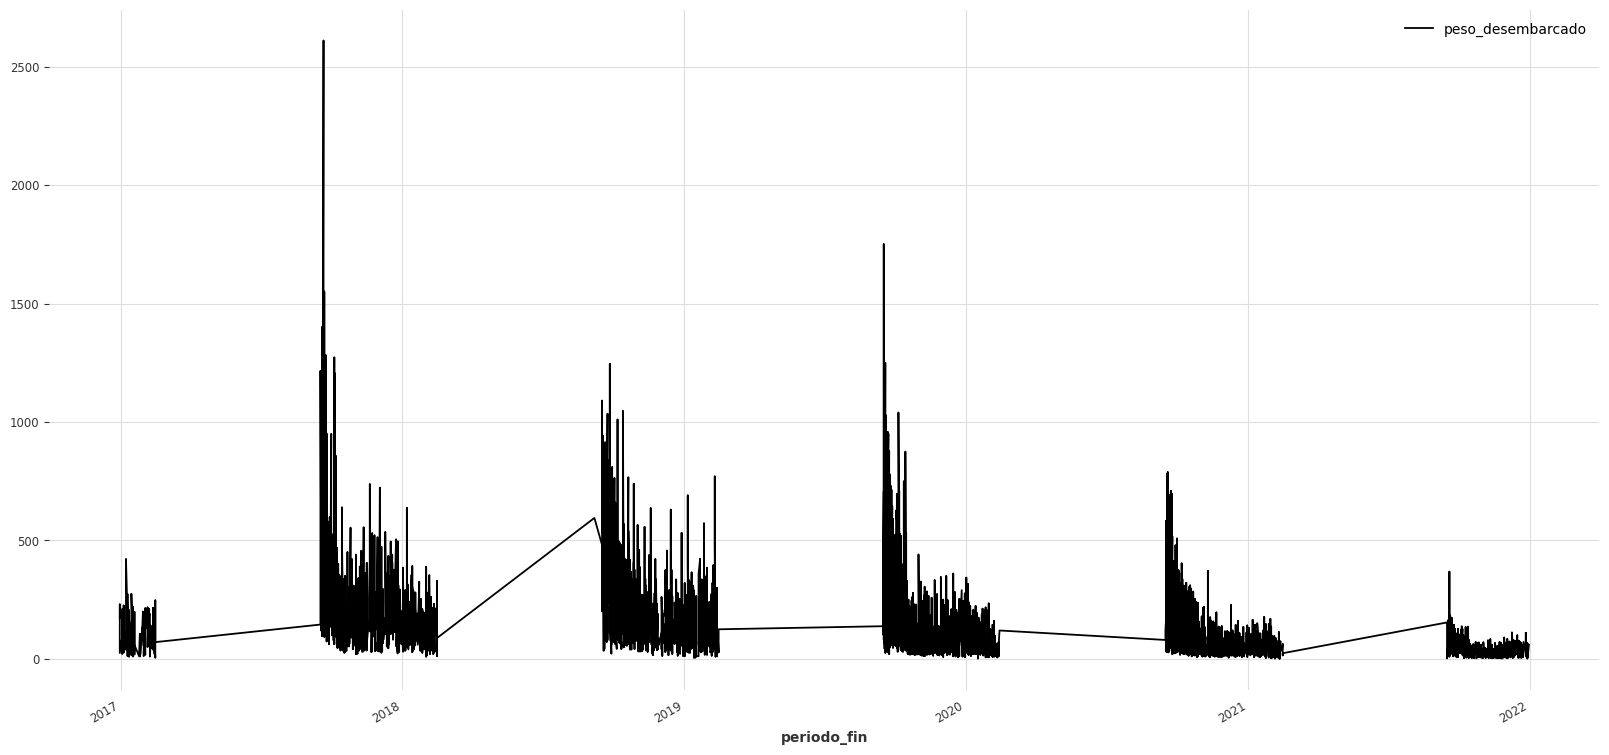

In [48]:
# plot arima_data as a time series
arima_data.plot(x='periodo_fin', y='peso_desembarcado', figsize=(20, 10))


In [59]:
# are there duplicate dates in arima_data?
arima_data['periodo_fin'].is_unique

# drop duplcate dates
arima_data = arima_data.drop_duplicates(subset=['periodo_fin'])

/workspaces/COBI-Analysis/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


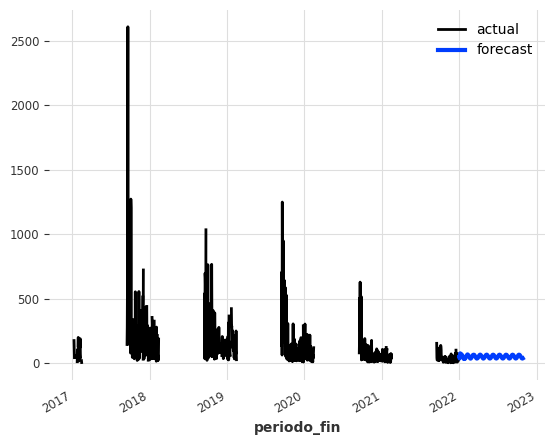

In [69]:
# turn arima_data to a time series object
from darts import TimeSeries
series = TimeSeries.from_dataframe(arima_data, 'periodo_fin', 'peso_desembarcado', fill_missing_dates=True, freq="D")

# optionally, use some future covariates; e.g. the value of the month encoded as a sine and cosine series
future_cov = datetime_attribute_timeseries(series, "day", cyclic=True, add_length=300)
# define ARIMA parameters
model = ARIMA(p=12, d=1, q=2)
model.fit(series, future_covariates=future_cov)
pred = model.predict(300, future_covariates=future_cov)
pred.values()

# plot the results
series.plot(label='actual')
pred.plot(label='forecast', lw=3)
plt.legend()

## Dealing with seasonality

ADF Statistic: -14.00561926567153
p-value: 3.793001964082668e-26


/workspaces/COBI-Analysis/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/COBI-Analysis/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/COBI-Analysis/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/workspaces/COBI-Analysis/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/workspaces/COBI-Analysis/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/COBI-Analysis/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/workspaces/COBI-Analysis/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `

<Axes: >

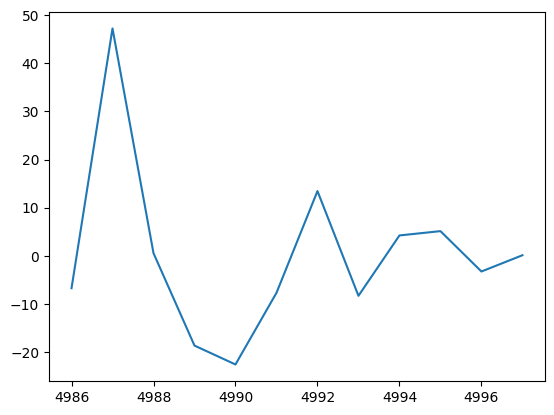

In [11]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model  import ARIMA
import matplotlib.pyplot as plt

# Load your time series data into a DataFrame
# Assuming 'date of catch' is set as the index, and 'fishing catch' is a column
# arima_data = pd.read_csv('your_data.csv')

# Step 3: Remove Seasonality by Differencing
arima_data['differenced'] = arima_data['peso_desembarcado'] - arima_data['peso_desembarcado'].shift(12)

# Step 4: Check for Stationarity
result = adfuller(arima_data['differenced'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Step 5: Model Building with ARIMA
# You'll need to determine the values of p, d, and q using ACF and PACF plots
# Example:
# plot_acf(arima_data['differenced'].dropna(), lags=40)
# plot_pacf(arima_data['differenced'].dropna(), lags=40)

# Fit the ARIMA model with selected hyperparameters
p=12 
d=1 
q=2

model = ARIMA(arima_data['differenced'].dropna(), order=(p, d, q))
fitted_model = model.fit()




/workspaces/COBI-Analysis/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/COBI-Analysis/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/workspaces/COBI-Analysis/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

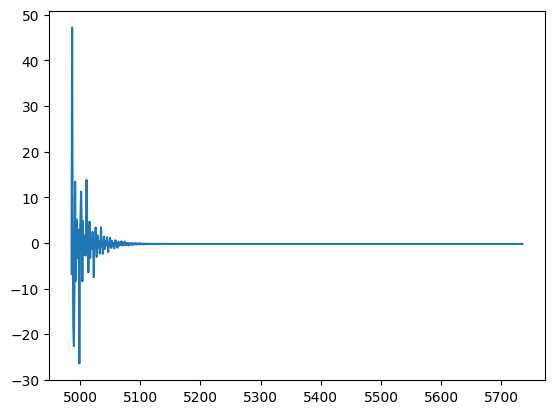

In [20]:
# Step 6: Forecasting
# Use the fitted model to make forecasts
# Example:
fitted_model.forecast(steps=300)

# # Visualization
# # Plot the original time series
# arima_data['peso_desembarcado'].plot()

# # Plot the differenced time series
# arima_data['differenced'].plot()

# # Plot the ACF and PACF plots for the differenced series
# plot_acf(arima_data['differenced'].dropna(), lags=40)
# plot_pacf(arima_data['differenced'].dropna(), lags=40)

# Plot the forecasted values appended to the original series
fitted_model.forecast(steps=750).plot()

